<a href="https://colab.research.google.com/github/dharanisriravi/Data_Science/blob/main/Bank_Personal_Loan_Modelling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix


In [2]:
# Load the dataset
df = pd.read_csv("Bank_Personal_Loan_Modellingg.csv")

# Show the first few rows
df.head()


,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [3]:
# Basic info
print(df.info())

# Summary statistics
print(df.describe())

# Check for missing values
print(df.isnull().sum())

# Check class distribution of target variable
print(df['Personal Loan'].value_counts())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB
None
                ID          Age   Experience       

In [6]:
from sklearn.preprocessing import StandardScaler

# Drop 'ID' and 'ZIP Code' as they are not useful for prediction
df_cleaned = df.drop(columns=['ID', 'ZIP Code'])

# Separate features and target
X = df_cleaned.drop('Personal Loan', axis=1)
y = df_cleaned['Personal Loan']

# Feature scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


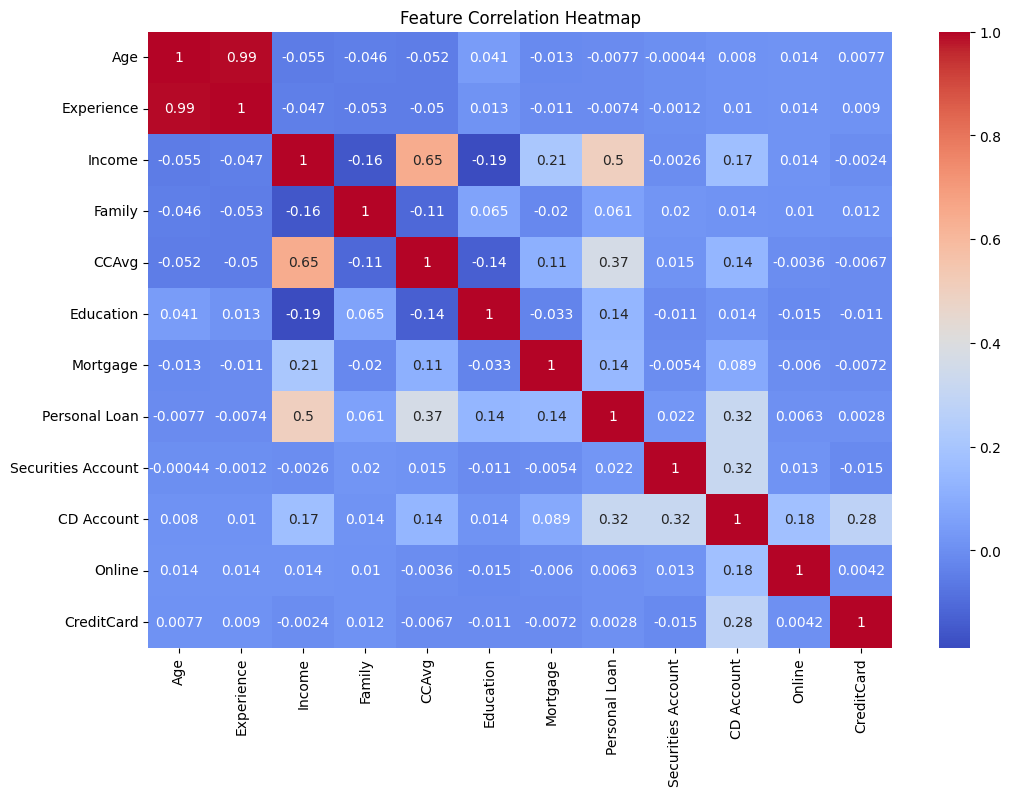

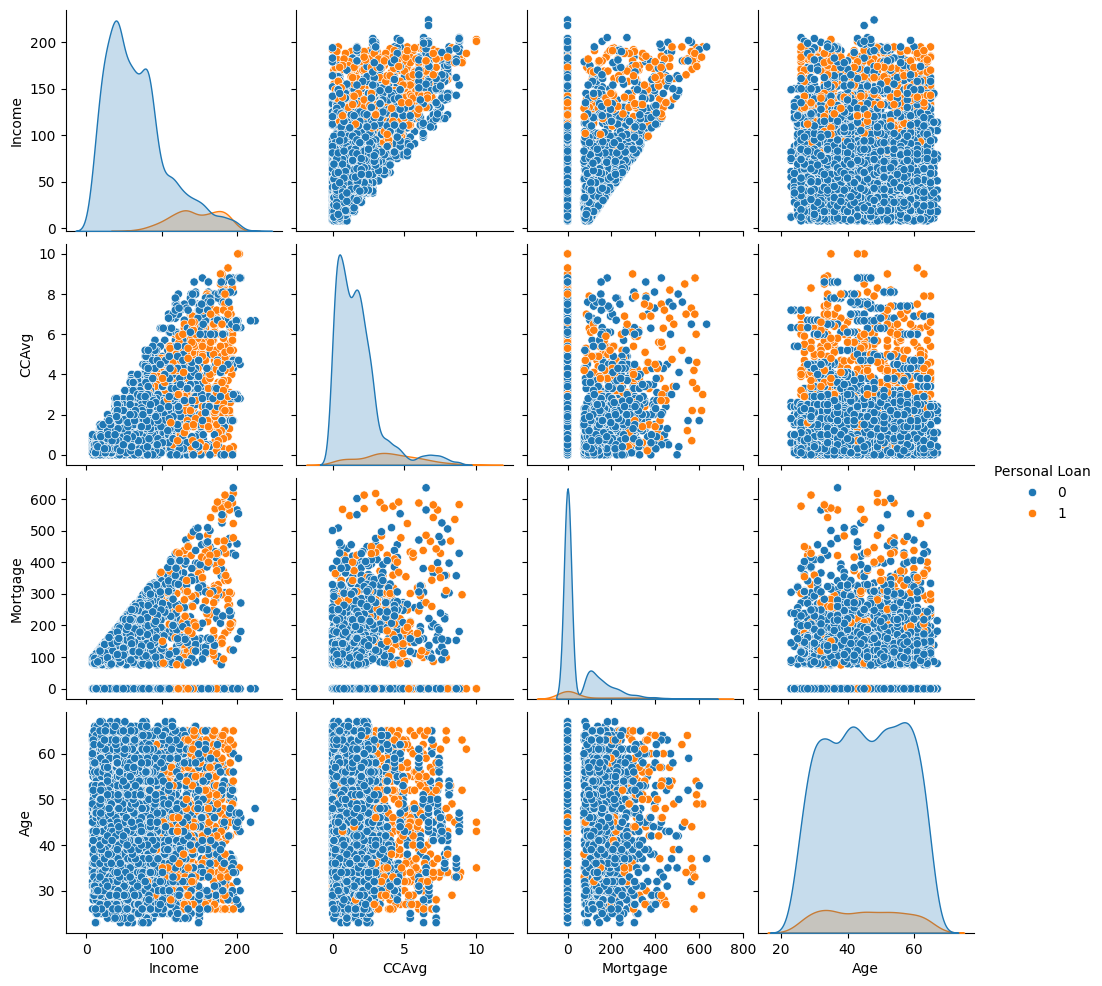

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(df_cleaned.corr(), annot=True, cmap="coolwarm")
plt.title("Feature Correlation Heatmap")
plt.show()

# Pair plot with target variable
sns.pairplot(df_cleaned[['Income', 'CCAvg', 'Mortgage', 'Age', 'Personal Loan']], hue='Personal Loan')
plt.show()


In [8]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# Split data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Initialize models
models = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42)
}

# Train models
for name, model in models.items():
    model.fit(X_train, y_train)
    print(f"{name} trained.")


Logistic Regression trained.
Decision Tree trained.
Random Forest trained.


In [9]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report

# Evaluate models
for name, model in models.items():
    y_pred = model.predict(X_test)
    print(f"\n{name} Performance:")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Precision:", precision_score(y_test, y_pred))
    print("Recall:", recall_score(y_test, y_pred))
    print("F1 Score:", f1_score(y_test, y_pred))
    print("ROC-AUC:", roc_auc_score(y_test, model.predict_proba(X_test)[:, 1]))



Logistic Regression Performance:
Accuracy: 0.954
Precision: 0.8554216867469879
Recall: 0.6761904761904762
F1 Score: 0.7553191489361702
ROC-AUC: 0.9683213620643789

Decision Tree Performance:
Accuracy: 0.988
Precision: 0.9514563106796117
Recall: 0.9333333333333333
F1 Score: 0.9423076923076923
ROC-AUC: 0.9638733705772812

Random Forest Performance:
Accuracy: 0.991
Precision: 0.9897959183673469
Recall: 0.9238095238095239
F1 Score: 0.9556650246305419
ROC-AUC: 0.9991221069433359


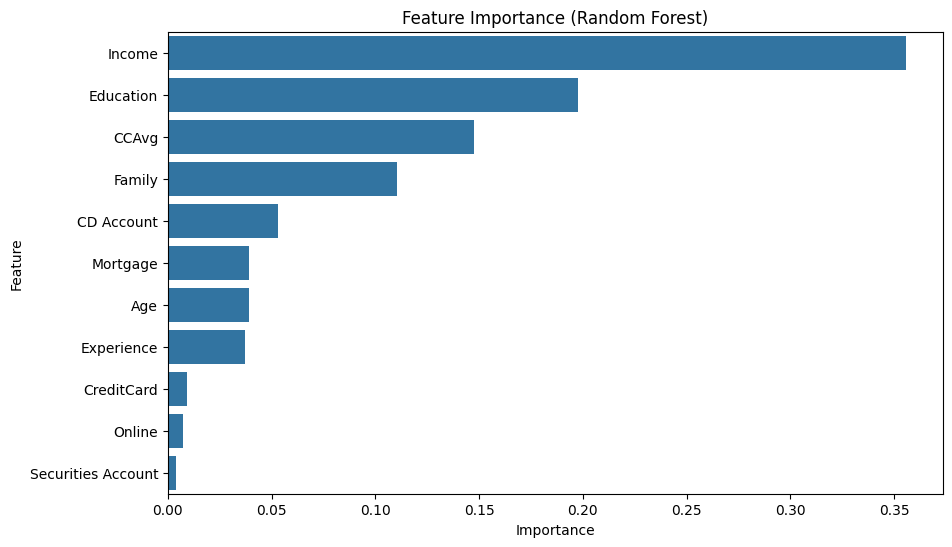

In [10]:
# Feature importance from Random Forest
importances = models['Random Forest'].feature_importances_
features = X.columns
importance_df = pd.DataFrame({'Feature': features, 'Importance': importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title("Feature Importance (Random Forest)")
plt.show()
